In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def mape_loss_func(preds, labels):
    mask = labels > 0
    return np.mean(np.fabs(labels[mask]-preds[mask])/labels[mask])

def smape_loss_func(preds, labels):
    mask= labels > 0
    return np.mean(np.fabs(labels[mask]-preds[mask])/(np.fabs(labels[mask])+np.fabs(preds[mask])))

def mae_loss_func(preds, labels):
    mask= labels > 0
    return np.fabs((labels[mask]-preds[mask])).mean()

def nrmse_func(preds, labels):
    mask= labels > 0
    return np.sqrt(np.sum((labels[mask]-preds[mask])**2)/np.sum(np.square(labels[mask])))

In [5]:
v = pd.read_csv('../data/revised_data/flow_y_revised.csv', header=0)

In [6]:
v.head()

,2015/7/1 0:10,2015/7/1 0:20,2015/7/1 0:30,2015/7/1 0:40,2015/7/1 0:50,2015/7/1 1:00,2015/7/1 1:10,2015/7/1 1:20,2015/7/1 1:30,2015/7/1 1:40,...,2015/7/31 22:30,2015/7/31 22:40,2015/7/31 22:50,2015/7/31 23:00,2015/7/31 23:10,2015/7/31 23:20,2015/7/31 23:30,2015/7/31 23:40,2015/7/31 23:50,2015/8/1 0:00
0,357.000000,303.000000,281.000000,279.000000,289.785714,231.000000,212.000000,205.000000,218.0,254.000000,...,752.000000,759.000000,743.000000,722.000000,649.000000,640.000000,581.000000,592.000000,537.000000,435.0
1,337.222222,347.375000,292.311667,237.954545,224.310345,205.000000,176.000000,163.000000,162.0,158.821429,...,604.269231,622.423077,579.375000,606.000000,589.740741,603.041667,606.000000,569.583333,527.000000,500.0
2,125.000000,97.588148,101.444444,105.000000,96.170569,105.000000,69.291667,61.153846,65.0,61.653846,...,290.692308,285.000000,285.000000,289.692308,217.000000,200.000000,200.000000,191.223704,200.000000,200.0
3,121.000000,128.000000,132.000000,85.000000,74.000000,90.000000,71.000000,67.000000,55.0,78.744444,...,432.000000,410.000000,401.714286,370.000000,348.000000,333.000000,324.000000,338.000000,272.000000,270.0
4,184.960000,188.750000,200.730769,164.000000,172.925926,143.392857,142.000000,127.851852,106.0,116.275862,...,420.000000,424.000000,395.633333,405.038461,396.040000,351.000000,362.851852,376.040000,315.230769,249.0


In [7]:
v = v.iloc[:,-4464:]

In [8]:
v_test = v.iloc[:,-1008:]


In [9]:
vlist = []

for i in range(1,24):
    vlist.append(np.asarray(v.iloc[:,144*(i-1):144*i]))

In [10]:
vlist = np.array(vlist)
vlist.shape

(23, 40, 144)

In [11]:
vmean24 = vlist.mean(axis=0)
vmean24.shape

(40, 144)

In [12]:

v_ha = vmean24
v_ha_7 = np.concatenate((v_ha,v_ha,v_ha,v_ha,v_ha,v_ha,v_ha), axis = 1)
print(np.shape(v_ha_7))

(40, 1008)


In [13]:
v_ha_7_df = pd.DataFrame(v_ha_7[:,-1008:])
# v_ha_7_df = v_test.iloc[:,-144*7:-144]
v_test1 = v_test.iloc[:,-144*7:]


In [14]:
mape_mean = mape_loss_func(np.asarray(v_ha_7_df), np.asarray(v_test1))
smape_mean = smape_loss_func(np.asarray(v_ha_7_df), np.asarray(v_test1))
mae_mean = mae_loss_func(np.asarray(v_ha_7_df), np.asarray(v_test1))
nrmse_mean = nrmse_func(np.asarray(v_ha_7_df), np.asarray(v_test1))

print('mape = ' + str(mape_mean) + '\n' + 'smape = ' + str(smape_mean) + '\n' + 'mae = ' 
+ str(mae_mean) + '\n' + 'nrmse = ' + str(nrmse_mean))

mape = 0.16898316538561528
smape = 0.0792055635463215
mae = 51.39691238311415
nrmse = 0.16938246445028923


In [16]:
np.asarray(v_test1).shape

(40, 1008)

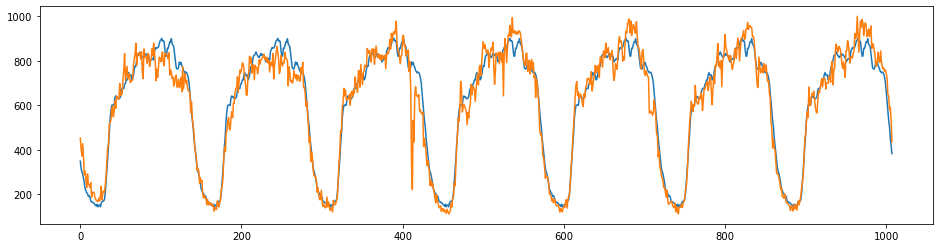

In [18]:
plt.figure(figsize=[16,4])
plt.plot(np.asarray(v_ha_7_df)[0, :])
plt.plot(np.asarray(v_test1)[0, :])

In [28]:
# np.savetxt('24ha.csv', v_ha_7)

In [21]:
for i in range(6):    
    mape_mean = mape_loss_func(np.asarray(v_ha_7_df), np.asarray(v_test))
    smape_mean = smape_loss_func(np.asarray(v_ha_7_df), np.asarray(v_test))
    mae_mean = mae_loss_func(np.asarray(v_ha_7_df), np.asarray(v_test))
    nrmse_mean = nrmse_func(np.asarray(v_ha_7_df), np.asarray(v_test))

    print(str(i) + '\n' + 'mape = ' + str(mape_mean) + '\n' + 'smape = ' + str(smape_mean) + '\n' + 'mae = ' 
    + str(mae_mean) + '\n' + 'nrmse = ' + str(nrmse_mean))

0
mape = 0.17441967236015823
smape = 0.08236006038281223
mae = 52.95567190176195
nrmse = 0.17656211521831872
1
mape = 0.17441967236015823
smape = 0.08236006038281223
mae = 52.95567190176195
nrmse = 0.17656211521831872
2
mape = 0.17441967236015823
smape = 0.08236006038281223
mae = 52.95567190176195
nrmse = 0.17656211521831872
3
mape = 0.17441967236015823
smape = 0.08236006038281223
mae = 52.95567190176195
nrmse = 0.17656211521831872
4
mape = 0.17441967236015823
smape = 0.08236006038281223
mae = 52.95567190176195
nrmse = 0.17656211521831872
5
mape = 0.17441967236015823
smape = 0.08236006038281223
mae = 52.95567190176195
nrmse = 0.17656211521831872
